In [1]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
import os

# List all CSV files in the 'CSVs' folder
csv_files = os.listdir('./CSVs')

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file
for file in csv_files:
    # Check if the file is a CSV file
    if file.endswith('.csv'):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join('./CSVs', file), encoding='latin1')  # Specify the encoding here
        # Append DataFrame excluding the header if it's not the first DataFrame
        if dfs:
            dfs.append(df.iloc[1:])
        else:
            dfs.append(df)

# Concatenate all DataFrames in the list along rows (axis=0)
df = pd.concat(dfs, axis=0)

# Reset index of the concatenated DataFrame
df.reset_index(drop=True, inplace=True)

# Display the shape of the concatenated DataFrame
print(df.shape)


/tmp/ipykernel_6683/358478917.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('./CSVs', file), encoding='latin1')  # Specify the encoding here
/tmp/ipykernel_6683/358478917.py:15: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('./CSVs', file), encoding='latin1')  # Specify the encoding here


(3119338, 86)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119338 entries, 0 to 3119337
Data columns (total 86 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  float64
 3    Destination IP               object 
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    object 
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

#### Column 61 and 42 are the same so delete one of it

In [4]:
df.drop(columns=[' Fwd Header Length.1'],inplace=True)

In [5]:
print(df[' Label'].value_counts())

 Label
BENIGN                        2359282
DoS Hulk                       231073
PortScan                       158930
DDoS                            41835
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


#### checking the Null values

In [6]:
print(df.isna().sum())

Flow ID               288602
 Source IP            288602
 Source Port          288602
 Destination IP       288602
 Destination Port     288602
                      ...   
 Idle Std             288602
 Idle Max             288602
 Idle Min             288602
 Label                288602
External IP          3077502
Length: 85, dtype: int64


In [7]:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', ' Label', 'External IP']


In [8]:
print(df['Flow Bytes/s'].isna().sum())

289960


In [9]:
label_encoder=LabelEncoder()
for i in categorical_list:
    if i != ' Label':
        df[i] = label_encoder.fit_transform(df[i])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119338 entries, 0 to 3119337
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       int64  
 1    Source IP                    int64  
 2    Source Port                  float64
 3    Destination IP               int64  
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    int64  
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

In [11]:
# Handling the Null values of the "Flow Bytes/s" and " Flow Packets/s" 

df["Flow Bytes/s"] = df["Flow Bytes/s"].replace("Infinity", -1)
df[" Flow Packets/s"] = df[" Flow Packets/s"].replace("Infinity", -1)
df["Flow Bytes/s"] = df["Flow Bytes/s"].replace("NaN", 0)
df[" Flow Packets/s"] = df[" Flow Packets/s"].replace("NaN", 0)

In [12]:
df.to_csv('./CSVs/alldata.csv',index=False)

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (40,9))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


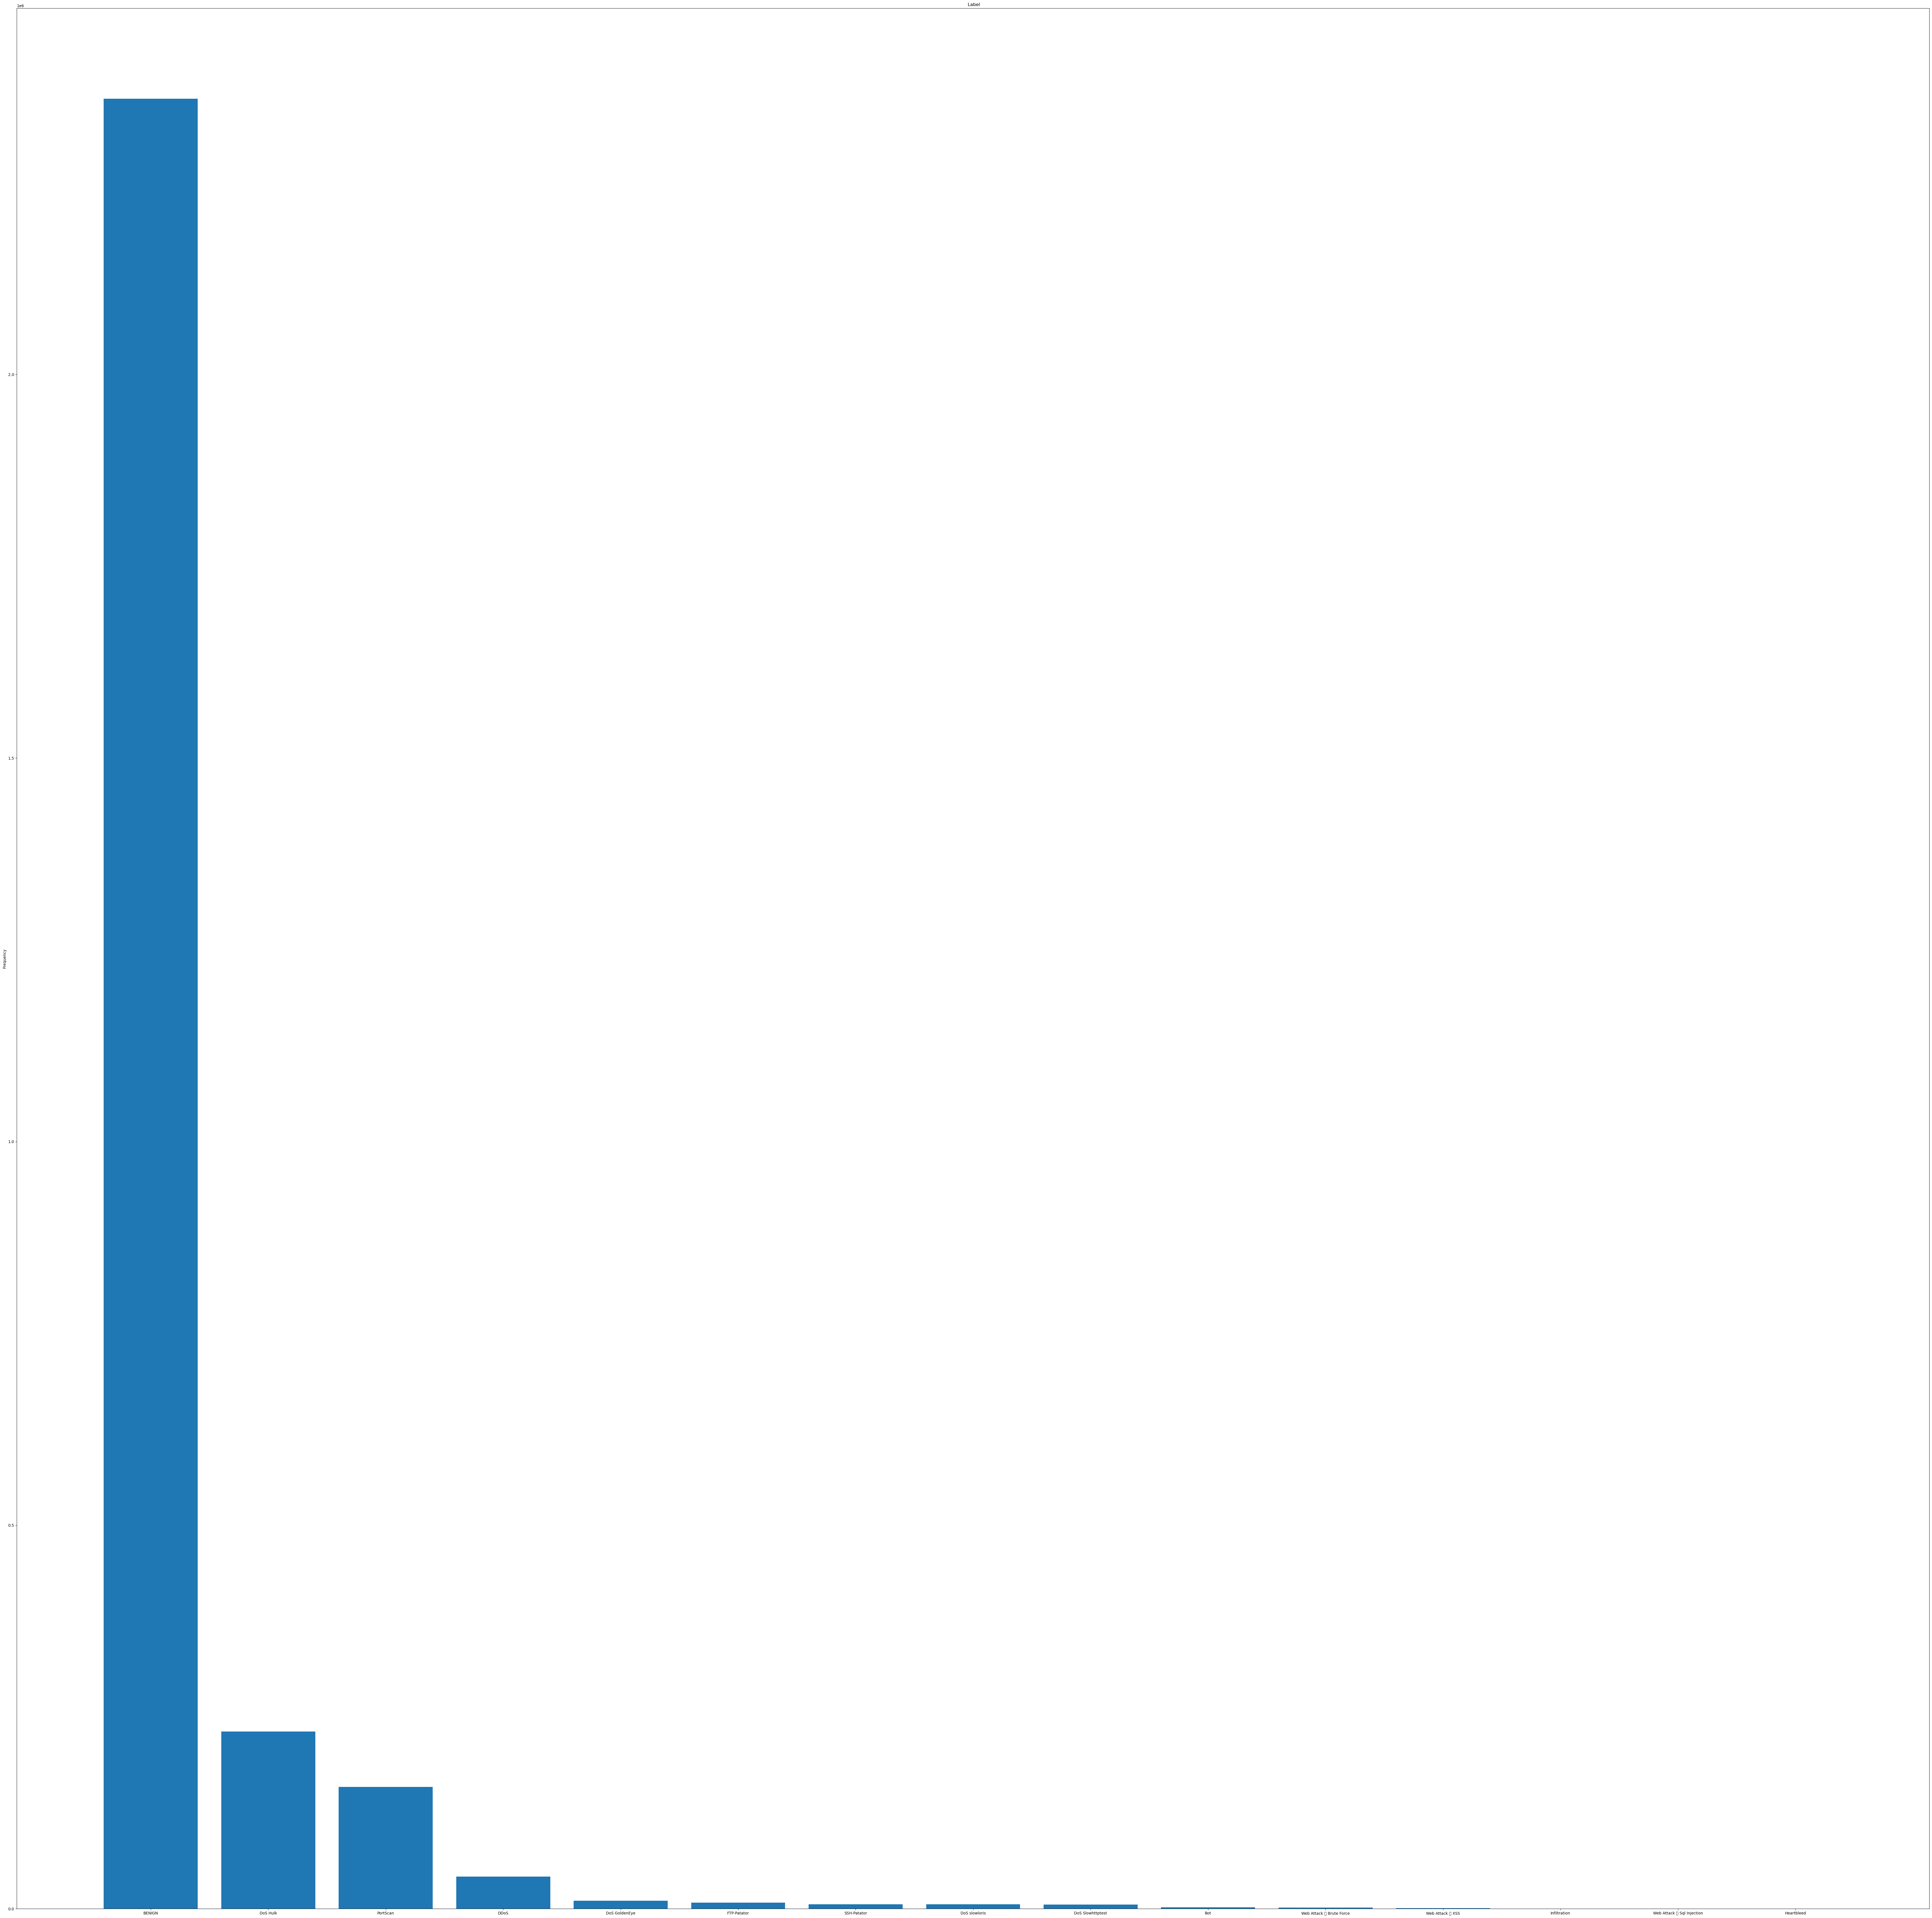

 Label:
 Label
BENIGN                        2359282
DoS Hulk                       231073
PortScan                       158930
DDoS                            41835
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [18]:
bar_plot(' Label')

In [19]:
df.loc[df[' Label'] != 'BENIGN', ' Label'] = 'Attack'

In [20]:
df[' Label'].value_counts()

 Label
BENIGN    2359282
Attack     760056
Name: count, dtype: int64

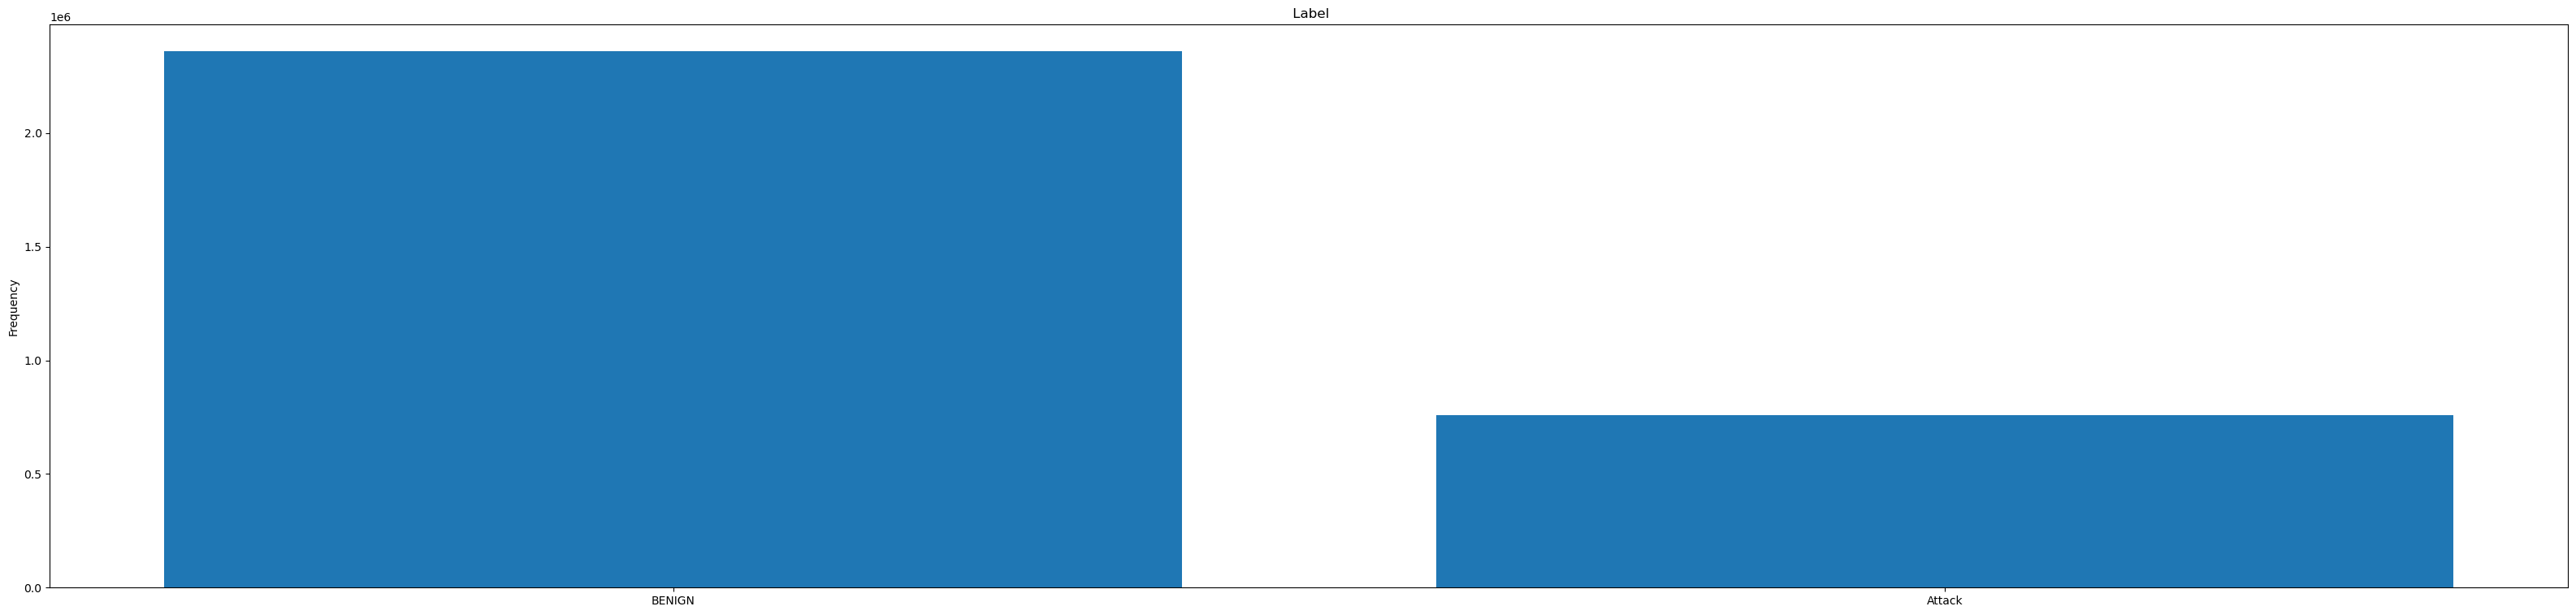

 Label:
 Label
BENIGN    2359282
Attack     760056
Name: count, dtype: int64


In [23]:
bar_plot(' Label')